In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import anderson

In [85]:
def generate_wiener_process(num_steps, num_processes, dt=0.01):
    """
    Generate Wiener processes.

    input:
        num_steps (int): Number of time steps.
        num_processes (int): Number of Wiener processes.
        dt (float): Time step size.

    output:
        numpy.ndarray: Array of shape (num_steps, num_processes) containing Wiener processes.
    """
    increments = np.random.normal(loc=0.0, scale=np.sqrt(dt), size=(num_steps, num_processes))
    wiener_processes = np.cumsum(increments, axis=0)
    return wiener_processes

def plot_wiener_processes(wiener_processes, dt=0.01):
    """
    Plot Wiener processes.

    input:
        wiener_processes (numpy.ndarray): Array of shape (num_steps, num_processes) containing Wiener processes.
        dt (float): Time step size.
    """
    num_steps, num_processes = wiener_processes.shape
    time = np.arange(0, num_steps*dt, dt)

    for i in range(num_processes):
        plt.plot(time, wiener_processes[:, i])
    plt.title('Wiener Processes')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

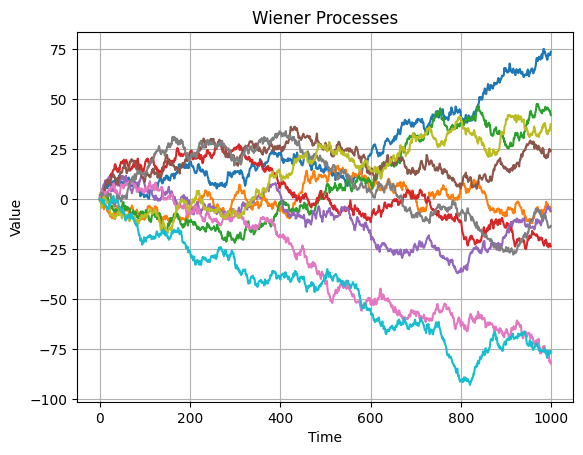

In [86]:
num_steps = 1000  # Number of time steps
num_processes = 10 # Number of Wiener processes
dt = 1  # Time step size

wiener_processes = generate_wiener_process(num_steps, num_processes, dt)
plot_wiener_processes(wiener_processes, dt)

The distribution of increments is not normal.


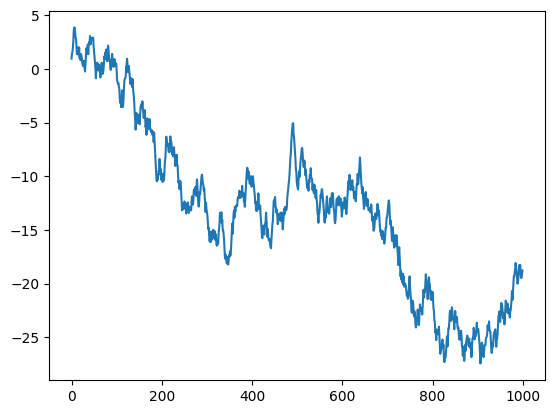

In [87]:
#verify if the increments of the process are Stationary
def calculate_increments(process):
    """
    Calculate increments from a given stochastic process.

    Parameters:
        process (numpy.ndarray): Array representing the stochastic process.

    Returns:
        numpy.ndarray: Array of increments.
    """
    increments = np.diff(process)
    return increments
    
def test_normality(increments):
    """
    Test if the distribution of increments is normal using the Anderson-Darling test.

    Parameters:
        increments (numpy.ndarray): Array representing the increments of the stochastic process.

    Returns:
        tuple: Tuple containing the Anderson-Darling test statistic and the critical values for significance levels.
    """
    result = anderson(increments, dist='norm')
    sts=result.statistic
    cvs=result.critical_values
    return sts<cvs[2]

def is_wiener(process):
    """
    Verify the pdf of increments for this stochastic process.

    Parameters:
        process (numpy.ndarray): Array representing the stochastic process.

    Returns:
        bool: True if the process is stationary, False otherwise.
    """
    
    increments = calculate_increments(process)
    
    return test_normality(increments)

# Example usage

# Generate example  process to test
num_steps = 1000
wiener_process = np.cumsum(np.random.uniform(low=-1.0, high=1.0,size=num_steps))
plt.plot(wiener_process)
# Check stationarity
stationary = is_wiener(wiener_process)
if stationary:
    print("The distribution of increments is normal.")
else:
    print("The distribution of increments is not normal.")

In [88]:
def generate_processes(num_steps, num_processes, dt=0.01):
    """
    Generate multiple stochastic processes.

    input:
        num_steps (int): Number of time steps.
        num_processes (int): Number of Wiener processes.
        dt (float): Time step size.

    output:
        numpy.ndarray: Array of shape (num_steps, num_processes) containing Wiener processes.
    """
#    increments = np.random.uniform(low=-1.0, high=1.0, size=(num_processes,num_steps))
    increments = np.random.normal(size=(num_processes,num_steps))
    processes = np.cumsum(increments, axis=1)
    return processes

def calculate_increments(process):
    """
    Calculate increments from a given stochastic process.

    Parameters:
        process (numpy.ndarray): Array representing the stochastic process.

    Returns:
        numpy.ndarray: Array of increments.
    """
    increments = np.diff(process)
    return increments

def test_normality(process):
    """
    Test if the distribution of increments is normal using the Anderson-Darling test.

    Parameters:
        process (numpy.ndarray): Array representing the stochastic process.

    Returns:
        boolean: Anderson-Darling test result at 95%CL.
    """
    increments = calculate_increments(process)
    result = anderson(increments, dist='norm')
    sts=result.statistic
    cvs=result.critical_values
    return sts<cvs[2]
    
def is_wiener_test(processes):
    """
    Verify the pdf of increments for this stochastic process.

    Parameters:
        process (numpy.ndarray): Array representing the stochastic process.

    Returns:
        bool: True if the process is stationary, False otherwise.
    """
    cnt=0
    
    num_processes, num_steps = processes.shape
    for ii in range(num_processes):
        if test_normality(processes[ii]):
            cnt=cnt+1

    return cnt/num_processes

num_processes = 1000 #how many test processes?
num_steps = 1000 #timesteps

processes = generate_processes(num_steps, num_processes)
print("% of Wiener processes in the list:", is_wiener_test(processes))

% of Wiener processes in the list: 0.96
